2022-09-14 10:32\
Kaunas

---

This course covers:
* Computer Intelligent paradigms and Decision-making theory
* Optimization and Search
* Supervised learning
* Unsupervised learning
* Reinforcement learning

Assessments:
* LD1 (20%) (KNN /  Decision tree / Random forest)
* LD2 (10%) (k-means / fuzzy c-means)
* LD3 (15%) (MCTS)
* Problem-solving task (25%)
* Exam (30%)

Artificial intelligence – systems that demonstrate intelligent behavior by analyzing its environment and making fairly independent decisions to achieve a goal.

Weak AI (narrow AI) (Focuses on a single task) < Strong AI (general AI) (Human) < Super AI (superintelligence)

Deep learning (Multilayered neural networks) ∈ ML (No explicit programing) ∈ AI

---

Example No. 1 Regression problem\
Try:
* egressionExample.ipynb
* continuosDataExample.tsv

[236465.8519176   -1411.54067893]


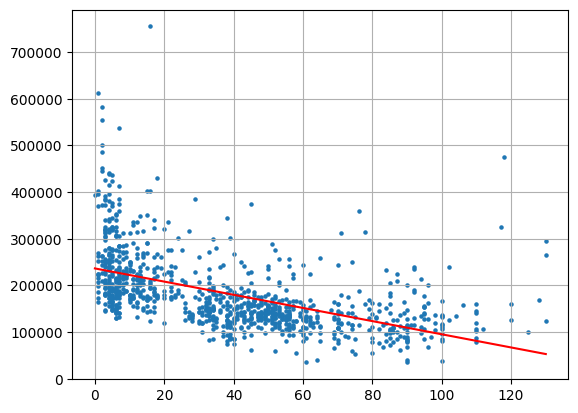

19797295886.152153
4039816530.5965967


In [1]:
import csv
import pandas
import matplotlib.pyplot as plt
import numpy

with open("../data/historicalData.tsv") as fd:
    data = list(csv.reader(fd, delimiter="\t"))
    cols = data[0]
    data = data[1:]
    df = pandas.DataFrame(data, columns=cols)
    df = df.set_index("Id")

df["YearBuilt"] = pandas.to_numeric(df["YearBuilt"])
df["SalePrice"] = pandas.to_numeric(df["SalePrice"])
max_year = df["YearBuilt"].max()
df["age"] = max_year - df["YearBuilt"]

fig = plt.figure()
ax = fig.gca()
ax.scatter(df["age"], df["SalePrice"], s = 5)
ax.grid()

# least square approximation

def get_polynomial(a_):
    pol_fun = lambda x : sum([pow(x, i) * a_[i] for i in range(len(a_))])
    return(pol_fun)

def get_error(pol_fun, x_, y_):
    n = len(x_)
    err = sum([pow(pol_fun(x_[i]) - y_[i], 2) for i in range(n)]) / (2*n)
    return(err)

# ---------

n_pol = 2
x = df["age"]
y = df["SalePrice"]

# obtaining polynomial coeficients
G = numpy.zeros((len(x), n_pol))
# G (len(x) x n_pol) looks like:
# 0 0
# 0 0
# 0 0
# 0 0
for i in range(0, n_pol):
    G[:,i] = x**i
# G (len(x) x n_pol) looks like:
# 1  7
# 1 34
# 1  9
# 1 95
# G - x values at n-th power

# We solve linear equation system to get coefficient matrix m
c = numpy.linalg.solve(numpy.matmul(G.transpose(),G), numpy.matmul(G.transpose(),y))
print(c)

pol_fun = get_polynomial(c)
ax.plot([min(x), max(x)], [pol_fun(min(x)), pol_fun(max(x))], c = "red")
plt.show()
# --------

print(get_error(get_polynomial([5,6]), df["age"], df["SalePrice"]))
print(get_error(get_polynomial([300000,-3333]), df["age"], df["SalePrice"]))



----

1. A function gradient is a vector representing a derivative of a function calculated at a given point
2. The direction of the gradient vector calculated at the point represents the direction in which the value of the argument needs to be changed to increase the value of the function. 
3. The length of the vector represents the rate of change of the function at that point
4. The gradient of a function of two variables is a vector in the xOy plane representing the partial derivatives of the function calculated at a given point
5. The direction of the gradient vector computed at the point represents the direction in which the value of the argument needs to be changed to increase the value of the function most rapidly. The length of the vector represents the rate of change of the function at that point
6. The length of the gradient vector is measured in different units than the values of the function and its arguments. Therefore, the scales of the function and its gradient representation are different in the same drawing;
7. The unit gradient vector is used to determine the direction of the fastest change in the function

Example No. 2 Optimization problem\
Try:


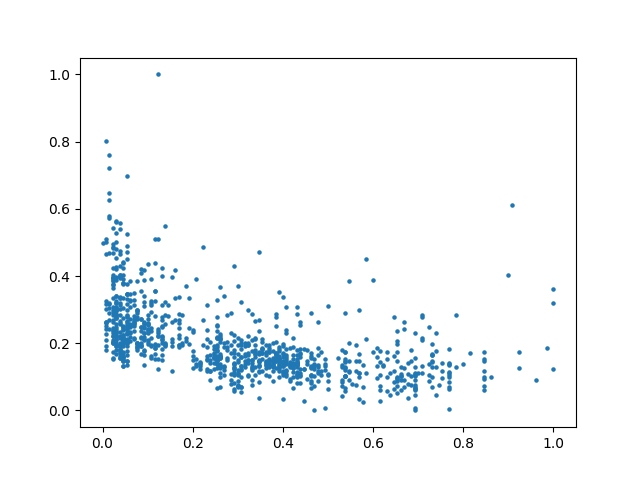

In [4]:

y = df["SalePrice"]
y_min = min(y)
y = [i - y_min for i in y]
y_max = max(y)
y = [i / y_max for i in y]

x = df["age"]
x_min = min(x)
x = [i - x_min for i in x]
x_max = max(x)
x = [i / x_max for i in x]

%matplotlib widget
from matplotlib.animation import FuncAnimation

def single_step(a_, x, y, delta):
    err = get_error(get_polynomial(a_), x, y)
    diriv_ = []
    for i in range(len(a_)):
        da_ = a_.copy()
        da_[i] = a_[i] + delta
        new_err = get_error(get_polynomial(da_), x, y)
        derr = new_err - err
        diriv = derr / delta
        diriv = 1 if diriv > 0 else -1
        diriv_.append(diriv)
    new_a_ = [a_[i] - diriv_[i] * delta for i in range(len(a_))]
    #print(diriv_)
    #print(a_)
    return (new_a_, err)

global a_
a_ = [0, 0, 0]
global err
err = get_error(get_polynomial(a_), x, y)
global delta
delta = 0.01


fig = plt.figure()
ax = fig.gca()
ax.scatter(x, y, s = 5)
xx = numpy.arange(min(x), max(x), 0.01)
line, = ax.plot([], c="red") 

#for i in range(500):
#    prev = err
#    a_, err = single_step(a_, x, y, delta)
#    delta = (1 - (prev - err) / prev) * delta
#    pol_fun = get_polynomial(a_)
#    yy = [pol_fun(i) for i in xx]
#    line.set_data((xx, yy))
    #print(prev - err)

global prev
prev = 0

def animate(i):
    global delta
    global err
    global prev
    global a_
    prev = err
    a_, err = single_step(a_, x, y, delta)
    delta = (1 - (prev - err) / prev) * delta
    pol_fun = get_polynomial(a_)
    yy = [pol_fun(i) for i in xx]
    line.set_data((xx, yy))
    return line

#for i in range(500):
#    animate(i)

anim = FuncAnimation(fig, animate, frames=500, interval=10, repeat = False)

#ax.plot(xx, yy, c = "red")
#ax.grid()


---

What am i missing?

* I don't remember the process of matrix multiplication and solving of linear equation system